In [1]:
from data import load_dataset, CustomDataset, get_dataloader
from matplotlib import pyplot as plt
from train import EarlyStopping, running_loop,test_model
from model import ResNet50, Base
import numpy as np
from torch import nn
import torch
import random
from torch.utils.data import ConcatDataset

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

#model define
model_original_canny=Base()
model_original_contrav=Base()
model_canny_contrav=Base()

#model put into gpu
model_original_canny=model_original_canny.to(device)
model_original_contrav=model_original_contrav.to(device)
model_canny_contrav=model_canny_contrav.to(device)

#get orginal dataset
tr,val,test=load_dataset()

Using cuda device


## Concat dataset

In [3]:
tr_canny=CustomDataset(tr,'canny')
tr_contrav=CustomDataset(tr,'contraversion')
val_canny=CustomDataset(val,'canny')
val_contrav=CustomDataset(val,'contraversion')
test_canny=CustomDataset(test,'canny')
test_contrav=CustomDataset(test,'contraversion')

In [4]:
#original+canny
tr_original_canny=ConcatDataset([tr,tr_canny])
val_original_canny=ConcatDataset([val,val_canny])
test_original_canny=ConcatDataset([test,test_canny])
print(f"before dataset num: {len(tr)}, after dataset num: {len(tr_original_canny)}")

before dataset num: 48000, after dataset num: 96000


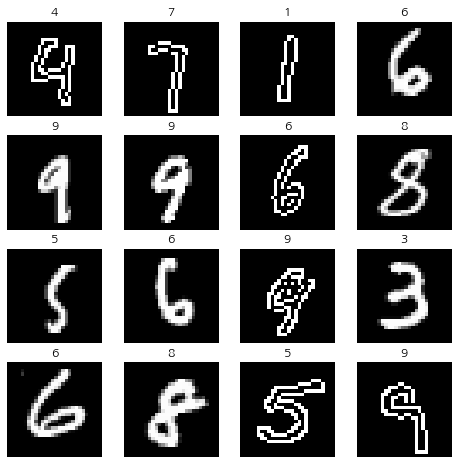

In [5]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 4, 4
for i in range(0, cols * rows ):
    sample_idx = torch.randint(len(tr_original_canny), size=(1,)).item()
    img, label = tr_original_canny[sample_idx]
    figure.add_subplot(rows, cols, i+1)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

In [6]:
#original+contrav
tr_original_contrav=ConcatDataset([tr,tr_contrav])
val_original_contrav=ConcatDataset([val,val_contrav])
test_original_contrav=ConcatDataset([test,test_contrav])
print(f"before dataset num: {len(tr)}, after dataset num: {len(tr_original_contrav)}")

before dataset num: 48000, after dataset num: 96000


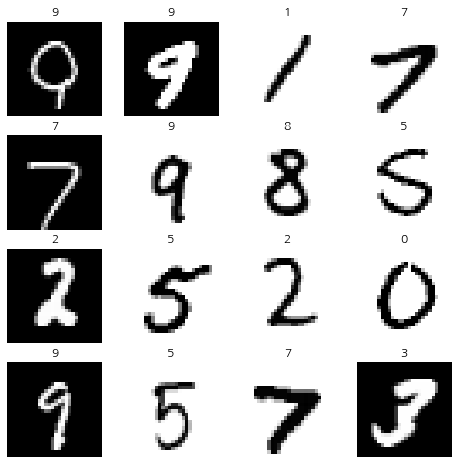

In [7]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 4, 4
for i in range(0, cols * rows ):
    sample_idx = torch.randint(len(tr_original_contrav), size=(1,)).item()
    img, label = tr_original_contrav[sample_idx]
    figure.add_subplot(rows, cols, i+1)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

In [8]:
#canny+contrav
tr_canny_contrav=ConcatDataset([tr_canny,tr_contrav])
val_canny_contrav=ConcatDataset([val_canny,val_contrav])
test_canny_contrav=ConcatDataset([test_canny,test_contrav])
print(f"before dataset num: {len(tr)}, after dataset num: {len(tr_canny_contrav)}")

before dataset num: 48000, after dataset num: 96000


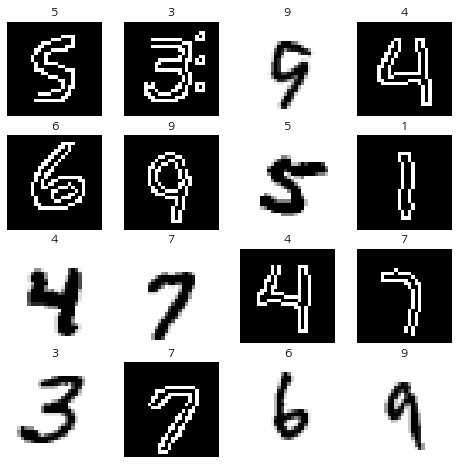

In [9]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 4, 4
for i in range(0, cols * rows ):
    sample_idx = torch.randint(len(tr_canny_contrav), size=(1,)).item()
    img, label = tr_canny_contrav[sample_idx]
    figure.add_subplot(rows, cols, i+1)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

In [10]:
dataloaders_original_canny=[]
for dataset in [tr_original_canny,val_original_canny,test_original_canny]:
    dataloaders_original_canny.append(get_dataloader(dataset))

In [11]:
dataloaders_original_contrav=[]
for dataset in [tr_original_contrav,val_original_contrav,test_original_contrav]:
    dataloaders_original_contrav.append(get_dataloader(dataset))

In [12]:
dataloaders_canny_contrav=[]
for dataset in [tr_canny_contrav,val_canny_contrav,test_canny_contrav]:
    dataloaders_canny_contrav.append(get_dataloader(dataset))

In [13]:
#define how much epoches to run
epoches = 2

# loss function
loss_fn = nn.CrossEntropyLoss() 

# optimizer
optimizer1 = torch.optim.Adam(model_original_canny.parameters(), lr=1e-3) 
optimizer2 = torch.optim.Adam(model_original_contrav.parameters(), lr=1e-3) 
optimizer3 = torch.optim.Adam(model_canny_contrav.parameters(), lr=1e-3)

In [14]:
early_stopping = EarlyStopping(patience=5 ,verbose=True, path='checkpoint1/checkpoint.pt')
loss_list1= []
acc_list1=[]
for epoch in range(1, epoches+1):
    print(f"epoch: {epoch}")
    loss,acc=running_loop(dataloaders_original_canny[0],device,optimizer1,model_original_canny,loss_fn, True)
    print(f"{epoch}: loss={loss}, accuracy={acc}")
    
    val_loss, val_acc=running_loop(dataloaders_original_canny[1],device,optimizer1,model_original_canny,loss_fn, False)
    print(f"{epoch}: val_loss={val_loss}, val_accuracy={val_acc}")
    early_stopping(val_loss, model_original_canny)
    loss_list1.append(val_loss)
    acc_list1.append(val_acc)
    
    if early_stopping.early_stop==True:
        print("Early stopping !")
        break
print("DONE")

epoch: 1


100%|███████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:36<00:00, 41.60it/s]


1: loss=0.0001332646111647288, accuracy=0.9459270833333333


100%|█████████████████████████████████████████████████████████████████████████████████| 375/375 [00:07<00:00, 47.98it/s]


1: val_loss=0.00020999962091445922, val_accuracy=0.9758333333333333
Validation loss decreased (inf --> 0.000210).  Saving model ...
epoch: 2


100%|███████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:35<00:00, 41.98it/s]


2: loss=2.496673911809921e-05, accuracy=0.9802083333333333


100%|█████████████████████████████████████████████████████████████████████████████████| 375/375 [00:07<00:00, 48.33it/s]

2: val_loss=0.0003668738603591919, val_accuracy=0.9807916666666666
Earlystopping 동작: 1 out of 5
DONE


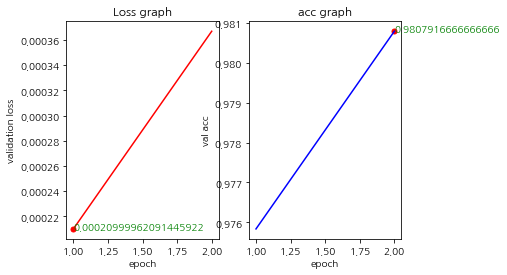

In [15]:
xrange=range(1,len(loss_list1)+1)
plt.subplot(1, 2, 1) 
plt.plot(xrange,loss_list1, "r")
plt.xlabel('epoch')
plt.ylabel('validation loss')
plt.title('Loss graph')
min_point=min(loss_list1)
plt.scatter(loss_list1.index(min_point)+1, min_point,s= 100,c='r',marker='.')
plt.text(loss_list1.index(min_point)+1, min_point, min_point, c='g')

plt.subplot(1,2,2)
plt.plot(xrange,acc_list1, "b")
plt.xlabel('epoch')
plt.ylabel('val acc')
plt.title('acc graph')
max_point=max(acc_list1)
plt.scatter(acc_list1.index(max_point)+1, max_point,s= 100,c='r',marker='.')
plt.text(acc_list1.index(max_point)+1, max_point, max_point, c='g')
plt.show()

In [16]:
early_stopping = EarlyStopping(patience=5 ,verbose=True, path='checkpoint2/checkpoint.pt')
loss_list2= []
acc_list2=[]
for epoch in range(1, epoches+1):
    print(f"epoch: {epoch}")
    loss,acc=running_loop(dataloaders_original_contrav[0],device,optimizer2,model_original_contrav,loss_fn, True)
    print(f"{epoch}: loss={loss}, accuracy={acc}")
    
    val_loss, val_acc=running_loop(dataloaders_original_contrav[1],device,optimizer2,model_original_contrav,loss_fn, False)
    print(f"{epoch}: val_loss={val_loss}, val_accuracy={val_acc}")
    early_stopping(val_loss, model_original_contrav)
    loss_list2.append(val_loss)
    acc_list2.append(val_acc)
    
    if early_stopping.early_stop==True:
        print("Early stopping !")
        break
print("DONE")

epoch: 1


100%|███████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:22<00:00, 65.81it/s]


1: loss=1.930860181649526e-05, accuracy=0.9387604166666667


100%|█████████████████████████████████████████████████████████████████████████████████| 375/375 [00:04<00:00, 84.65it/s]


1: val_loss=2.4396178623040517e-05, val_accuracy=0.979125
Validation loss decreased (inf --> 0.000024).  Saving model ...
epoch: 2


100%|███████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:22<00:00, 65.64it/s]


2: loss=1.4564064641793569e-05, accuracy=0.9793020833333334


100%|█████████████████████████████████████████████████████████████████████████████████| 375/375 [00:04<00:00, 83.71it/s]

2: val_loss=0.00016950788100560506, val_accuracy=0.9827916666666666
Earlystopping 동작: 1 out of 5
DONE


In [17]:
loss_list2

[2.4396178623040517e-05, 0.00016950788100560506]

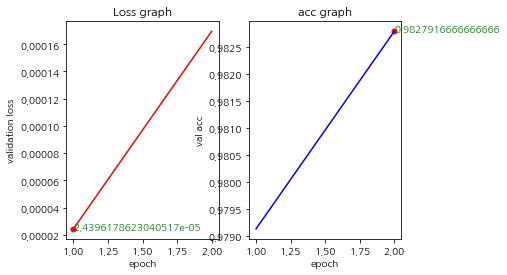

In [18]:
xrange=range(1,len(loss_list2)+1)
plt.subplot(1, 2, 1) 
plt.plot(xrange,loss_list2, "r")
plt.xlabel('epoch')
plt.ylabel('validation loss')
plt.title('Loss graph')
min_point=min(loss_list2)
plt.scatter(loss_list2.index(min_point)+1, min_point,s= 100,c='r',marker='.')
plt.text(loss_list2.index(min_point)+1, min_point, min_point, c='g')

plt.subplot(1,2,2)
plt.plot(xrange,acc_list2, "b")
plt.xlabel('epoch')
plt.ylabel('val acc')
plt.title('acc graph')
max_point=max(acc_list2)
plt.scatter(acc_list2.index(max_point)+1, max_point,s= 100,c='r',marker='.')
plt.text(acc_list2.index(max_point)+1, max_point, max_point, c='g')
plt.show()

In [19]:
early_stopping = EarlyStopping(patience=5 ,verbose=True, path='checkpoint3/checkpoint.pt')
loss_list3= []
acc_list3=[]
for epoch in range(1, epoches+1):
    print(f"epoch: {epoch}")
    loss,acc=running_loop(dataloaders_canny_contrav[0],device, optimizer3, model_canny_contrav,loss_fn, True)
    print(f"{epoch}: loss={loss}, accuracy={acc}")
    
    val_loss, val_acc=running_loop(dataloaders_canny_contrav[1],device, optimizer3, model_canny_contrav,loss_fn, False)
    print(f"{epoch}: val_loss={val_loss}, val_accuracy={val_acc}")
    early_stopping(val_loss, model_canny_contrav)
    
    loss_list3.append(val_loss)
    acc_list3.append(val_acc)
    
    if early_stopping.early_stop==True:
        print("Early stopping !")
        break
print("DONE")

epoch: 1


100%|███████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:41<00:00, 36.57it/s]


1: loss=4.8582340280214945e-05, accuracy=0.9403125


100%|█████████████████████████████████████████████████████████████████████████████████| 375/375 [00:09<00:00, 40.25it/s]


1: val_loss=9.85083281993866e-05, val_accuracy=0.9765833333333334
Validation loss decreased (inf --> 0.000099).  Saving model ...
epoch: 2


100%|███████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:41<00:00, 35.91it/s]


2: loss=3.144469857215881e-05, accuracy=0.9791770833333333


100%|█████████████████████████████████████████████████████████████████████████████████| 375/375 [00:09<00:00, 39.21it/s]

2: val_loss=0.00016292791565259297, val_accuracy=0.983375
Earlystopping 동작: 1 out of 5
DONE


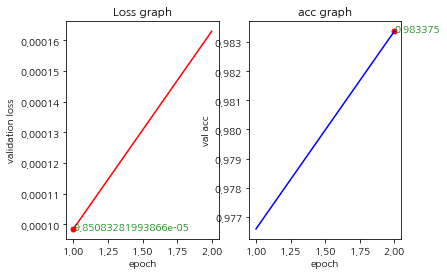

In [20]:
xrange=range(1,len(loss_list3)+1)
plt.subplot(1, 2, 1) 
plt.plot(xrange,loss_list3, "r")
plt.xlabel('epoch')
plt.ylabel('validation loss')
plt.title('Loss graph')
min_point=min(loss_list3)
plt.scatter(loss_list3.index(min_point)+1, min_point,s= 100,c='r',marker='.')
plt.text(loss_list3.index(min_point)+1, min_point, min_point, c='g')

plt.subplot(1,2,2)
plt.plot(xrange,acc_list3, "b")
plt.xlabel('epoch')
plt.ylabel('val acc')
plt.title('acc graph')
max_point=max(acc_list3)
plt.scatter(acc_list3.index(max_point)+1, max_point,s= 100,c='r',marker='.')
plt.text(acc_list3.index(max_point)+1, max_point, max_point, c='g')
plt.show()

# 평가실험
B. 두가지 데이터셋 혼합조합

## original+canny 성능평가

In [21]:
test_model(dataloaders_original_canny[2], model_original_canny, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(0.062221645244424, 0.9797)

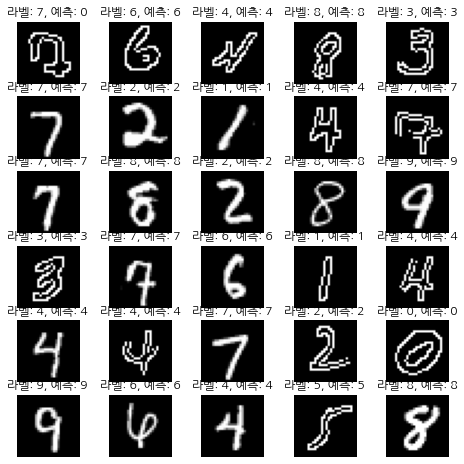

In [22]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=test_original_canny
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_original_canny(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

## original+contrav 성능평가

In [23]:
test_model(dataloaders_original_contrav[2], model_original_contrav, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(0.05098078008919669, 0.98335)

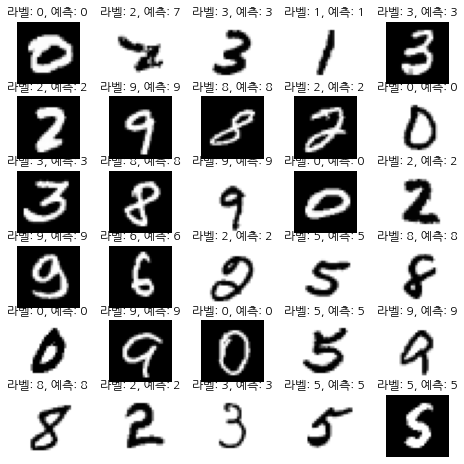

In [24]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=test_original_contrav
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_original_contrav(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

## canny+contrav 성능평가

In [25]:
test_model(dataloaders_canny_contrav[2], model_canny_contrav, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(0.0540244442056686, 0.98225)

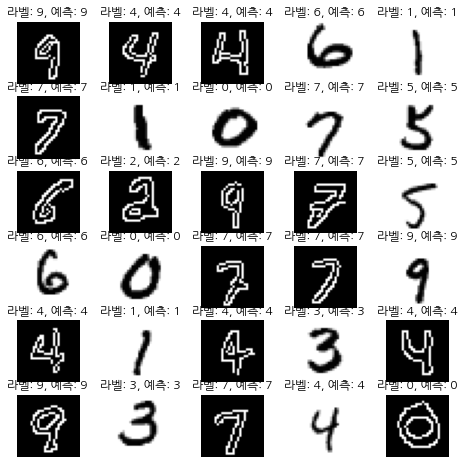

In [26]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=test_canny_contrav
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_canny_contrav(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

## tr: original+canny, test: original+contrav

In [27]:
test_model(dataloaders_original_canny[2], model_original_contrav, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(0.4884930872641052, 0.8709)

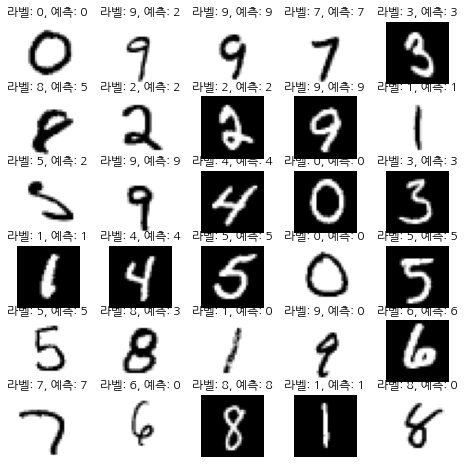

In [28]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=test_original_contrav
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_original_canny(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

## tr: original+canny, test: canny+contrav

In [47]:
test_model(dataloaders_canny_contrav[2], model_original_canny, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(0.6817580371523817, 0.78775)

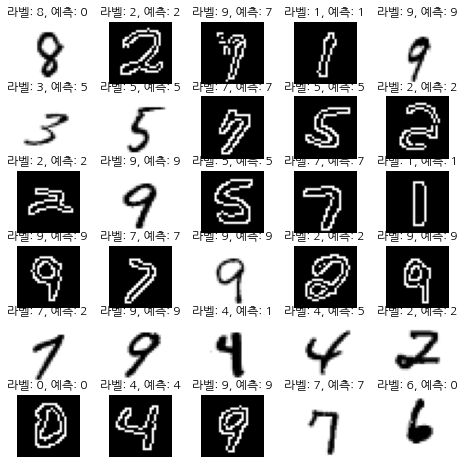

In [30]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=test_canny_contrav
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_original_canny(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

## tr: original+contrav, test: original+canny

In [31]:
test_model(dataloaders_original_canny[2], model_original_contrav, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(0.4865166584428507, 0.8709)

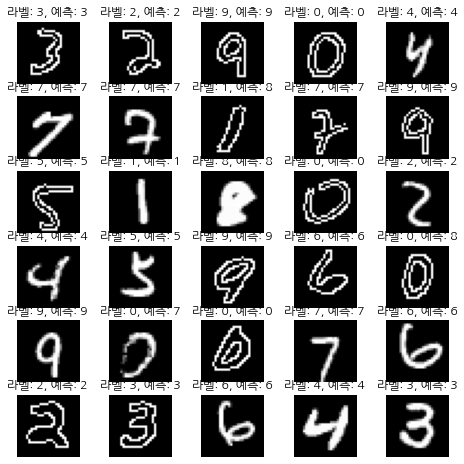

In [32]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=test_original_canny
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_original_contrav(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

## tr: original+contrav, test: canny+contrav

In [33]:
test_model(dataloaders_canny_contrav[2], model_original_contrav, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(0.485042441314973, 0.87115)

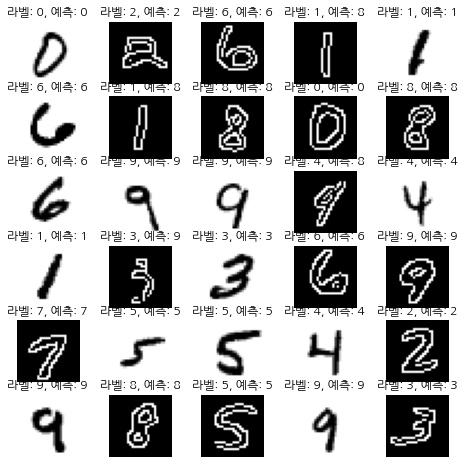

In [34]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=test_canny_contrav
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_original_contrav(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

## tr:canny+contrav, test: original+canny

In [35]:
test_model(dataloaders_original_canny[2], model_canny_contrav, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(0.2797243744610978, 0.905)

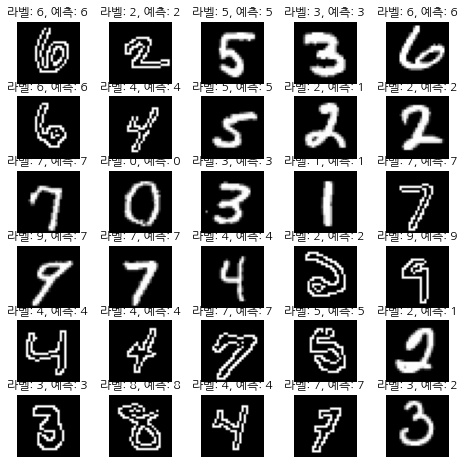

In [36]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=test_original_canny
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_canny_contrav(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

## tr: canny+contrav, test: original+contrav

In [37]:
test_model(dataloaders_original_contrav[2], model_canny_contrav, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(0.27472184358027796, 0.90745)

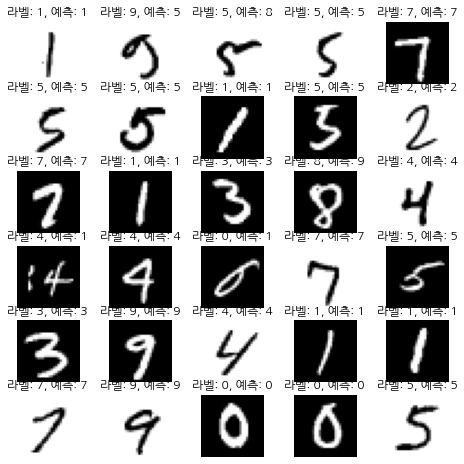

In [38]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=test_original_contrav
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_canny_contrav(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

# 추가

In [58]:
dataloaders_original=[]
for dataset in [tr,val,test]:
    dataloaders_original.append(get_dataloader(dataset))

dataloaders_canny=[]
for dataset in [tr,val,test]:
    dataset_canny=CustomDataset(dataset, 'canny')
    dataloaders_canny.append(get_dataloader(dataset_canny))
    
dataloaders_contrav=[]
for dataset in [tr,val,test]:
    dataset_contrav=CustomDataset(dataset, 'contraversion')
    dataloaders_contrav.append(get_dataloader(dataset_contrav))

## original+canny -> contrav

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

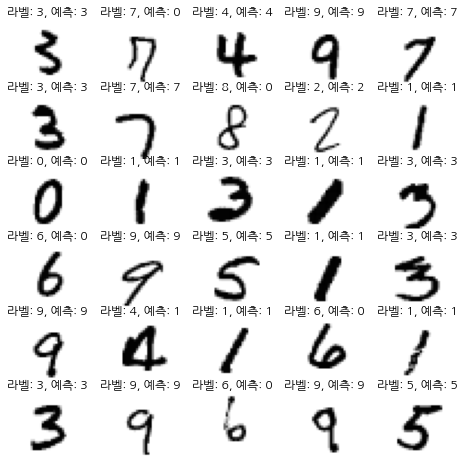

In [60]:
print(test_model(dataloaders_contrav[2], model_original_canny, loss_fn, device))

fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=test_contrav
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_original_canny(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

## original + contrav-> canny

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

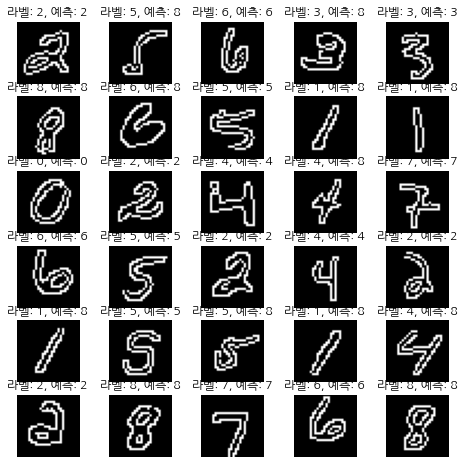

In [61]:
print(test_model(dataloaders_canny[2], model_original_contrav, loss_fn, device))

fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=test_canny
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_original_contrav(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

## canny+contrav -> original

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

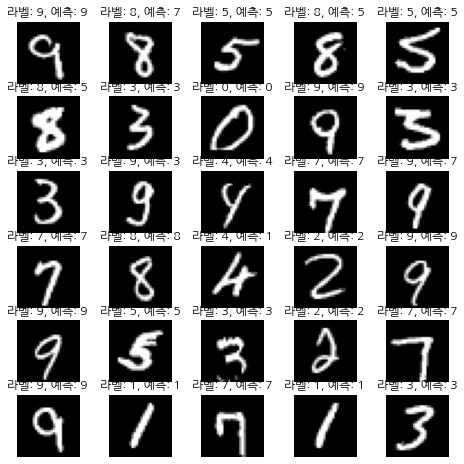

In [62]:
print(test_model(dataloaders_original[2], model_canny_contrav, loss_fn, device))

fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=test
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_canny_contrav(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

# 토탈 모델과 토탈 데이터 활용

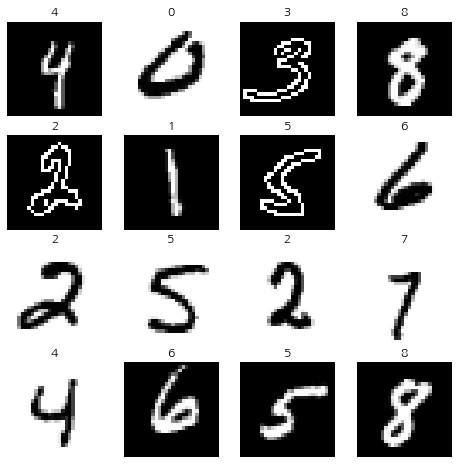

In [41]:
model_tot=Base()

#model put into gpu
model_tot=model_tot.to(device)

tr_tot=ConcatDataset([tr,tr_canny,tr_contrav])
val_tot=ConcatDataset([val,val_canny,val_contrav])
test_tot=ConcatDataset([test,test_canny,val_contrav])

figure = plt.figure(figsize=(8, 8))
cols, rows = 4, 4
for i in range(0, cols * rows ):
    sample_idx = torch.randint(len(tr_tot), size=(1,)).item()
    img, label = tr_tot[sample_idx]
    figure.add_subplot(rows, cols, i+1)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

In [43]:
dataloaders_tot=[]
for dataset in [tr_tot,val_tot,test_tot]:
    dataloaders_tot.append(get_dataloader(dataset))

optimizer4 = torch.optim.Adam(model_tot.parameters(), lr=1e-3)

In [44]:
early_stopping = EarlyStopping(patience=5 ,verbose=True, path='checkpoint1/checkpoint.pt')
loss_list4= []
acc_list4=[]
for epoch in range(1, epoches+1):
    print(f"epoch: {epoch}")
    loss,acc=running_loop(dataloaders_tot[0],device,optimizer4,model_tot,loss_fn, True)
    print(f"{epoch}: loss={loss}, accuracy={acc}")
    
    val_loss, val_acc=running_loop(dataloaders_tot[1],device,optimizer4,model_tot,loss_fn, False)
    print(f"{epoch}: val_loss={val_loss}, val_accuracy={val_acc}")
    early_stopping(val_loss, model_tot)
    loss_list4.append(val_loss)
    acc_list4.append(val_acc)
    
    if early_stopping.early_stop==True:
        print("Early stopping !")
        break
print("DONE")

epoch: 1


100%|███████████████████████████████████████████████████████████████████████████████| 2250/2250 [00:53<00:00, 41.68it/s]


1: loss=4.151411851247152e-05, accuracy=0.9501805555555556


100%|█████████████████████████████████████████████████████████████████████████████████| 563/563 [00:12<00:00, 46.39it/s]


1: val_loss=2.2331562032178705e-05, val_accuracy=0.9807222222222223
Validation loss decreased (inf --> 0.000022).  Saving model ...
epoch: 2


100%|███████████████████████████████████████████████████████████████████████████████| 2250/2250 [00:54<00:00, 41.42it/s]


2: loss=5.730547838740878e-06, accuracy=0.9818819444444444


100%|█████████████████████████████████████████████████████████████████████████████████| 563/563 [00:11<00:00, 46.95it/s]

2: val_loss=0.00010342082111280722, val_accuracy=0.9836388888888888
Earlystopping 동작: 1 out of 5
DONE


## 평가

In [45]:
test_model(dataloaders_tot[2], model_tot, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(0.04933245498081669, 0.98459375)

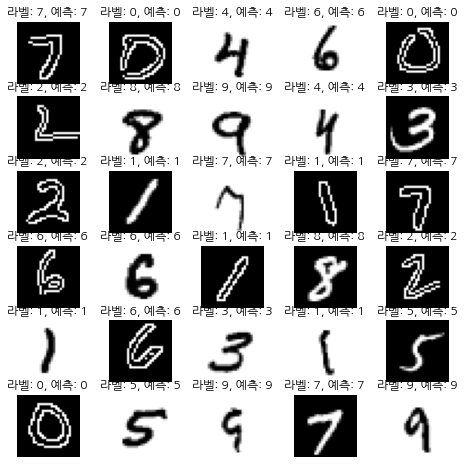

In [46]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=test_tot
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_tot(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

In [51]:
dataloaders_original=[]
for dataset in [tr,val,test]:
    dataloaders_original.append(get_dataloader(dataset))
dataloaders_canny=[]
for dataset in [tr,val,test]:
    dataset_canny=CustomDataset(dataset, 'canny')
    dataloaders_canny.append(get_dataloader(dataset_canny))
dataloaders_contrav=[]
for dataset in [tr,val,test]:
    dataset_contrav=CustomDataset(dataset, 'contraversion')
    dataloaders_contrav.append(get_dataloader(dataset_contrav))

## tr: tot, test:original

In [49]:
test_model(dataloaders_original[2], model_tot, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(0.042838759116745395, 0.9871)

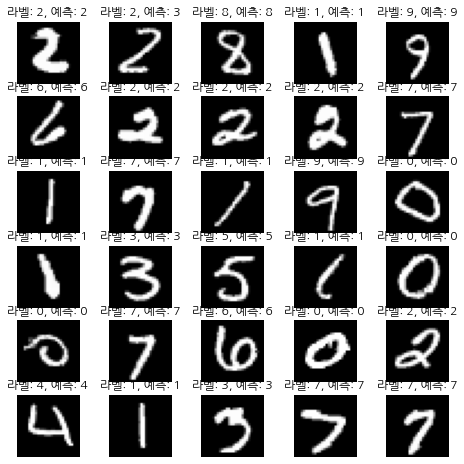

In [50]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=test
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_tot(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

## tr:tot , test: canny

In [52]:
test_model(dataloaders_canny[2], model_tot, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(0.053432723787015565, 0.9831)

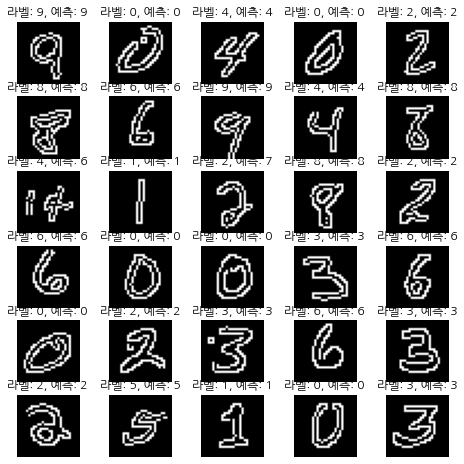

In [53]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=test_canny
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_tot(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

## tr: tot, test: contrav

In [54]:
test_model(dataloaders_contrav[2], model_tot, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(0.04988163645945751, 0.9847)

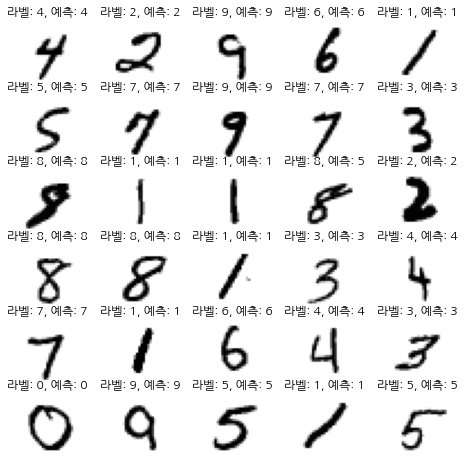

In [56]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=test_contrav
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_tot(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()